# $ETH On-chain Data Analysis Transaction value and GasUsed with Etherscan API

'In this notebook, I will perform an on-chain analysis of Ethereum transactions using the Etherscan API. By querying relevant transaction and contract data, we will extract key metrics that influence tokenomics, particularly the supply and demand aspects of Ethereum-based tokens.'

In [1]:
%pip install matplotlib requests pandas scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

In [4]:
# Replace with your Etherscan API Key
API_KEY=os.environ.get('ETHERSCAN_API_KEY')
# Define Etherscan API URL for Ethereum transactions (for this example, we query the latest blocks)
ETHERSCAN_API_URL = 'https://api.etherscan.io/api'

In [5]:
def get_ethereum_transactions(end, page=1, offset=10):
    params = {
        'module': 'account',
        'action': 'txlistinternal',
        'startblock': end-10000,
        'endblock': end,
        'page': page,
        'offset': offset,
        #'sort': 'asc',  # Sort by ascending order (earliest to latest)
        'sort': 'desc',  
        'apikey': API_KEY
    }
    
    response = requests.get(ETHERSCAN_API_URL, params=params)
    return response.json()


In [6]:
# Example: Fetch the first 10 Ethereum transactions for a specific address
#transaction_data = get_ethereum_transactions(page=1, offset=10000, end=21162070)
transaction_data = get_ethereum_transactions(page=1, offset=300, end=21162070)
transactions = transaction_data.get('result', [])
df = pd.DataFrame(transactions)
# Display the transactions dataframe
df.head()

,blockNumber,timeStamp,hash,from,to,value,contractAddress,input,type,gas,gasUsed,traceId,isError,errCode
0,21162070,1731299543,0x8f140ad30d64078cfe4bbee91bbb15e99e73d1c258ce...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x5014b08a8f6aa03e5763e3318f893ea3ff3028f8,310172730101400397,,,call,30444,0,0_1,0,
1,21162070,1731299543,0x8f140ad30d64078cfe4bbee91bbb15e99e73d1c258ce...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,310172730101400397,,,call,2300,83,0_1_1,0,
2,21162070,1731299543,0x12e316f3eaa6700013827a3be8c7c4eaa514f8e9f880...,0x1b81d678ffb9c0263b24a97847620c99d213eb14,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,5982000000000000000,,,call,179858,23974,0_1_1_1_1_1_1_1,0,
3,21162070,1731299543,0x12e316f3eaa6700013827a3be8c7c4eaa514f8e9f880...,0xbc82f984e028fd36613edc8620421df9879dc42b,0x1b81d678ffb9c0263b24a97847620c99d213eb14,5982000000000000000,,,call,309671,155677,0_1_1_1_1,0,
4,21162070,1731299543,0x12e316f3eaa6700013827a3be8c7c4eaa514f8e9f880...,0xde44500b5d1479df5c003bf48915b3e24df3e8dd,0xbc82f984e028fd36613edc8620421df9879dc42b,5982000000000000000,,,call,331681,174406,0_1_1_1,0,


## Transaction Data Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7328\3572418139.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')


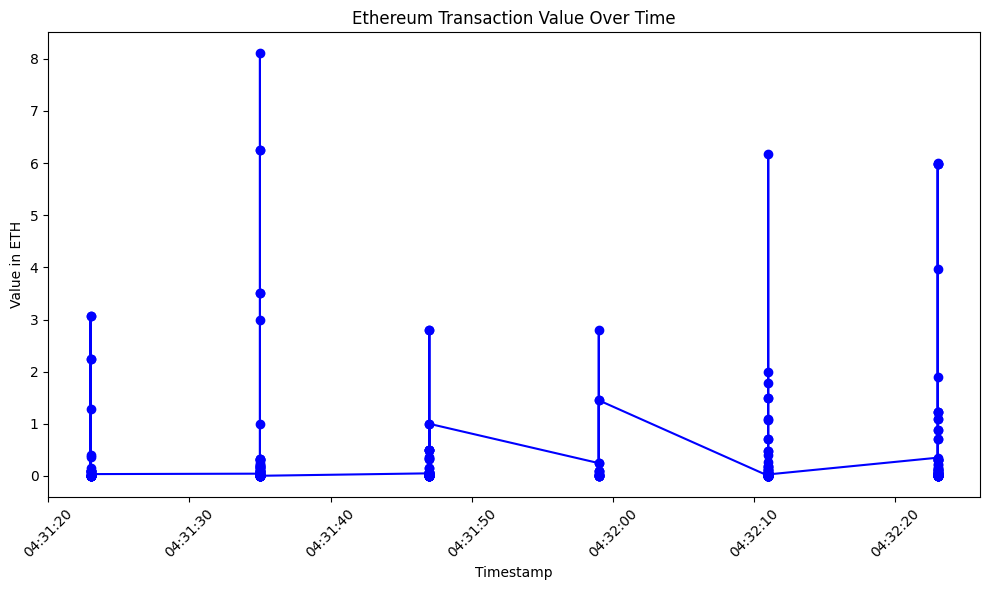

In [7]:
# Convert timestamp to a readable date
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')

# Convert Wei to Ether for easier reading
df['value'] = df['value'].apply(lambda x: int(x) / 10**18)

# Plot the value of ETH transferred over time
plt.figure(figsize=(10,6))
plt.plot(df['timeStamp'], df['value'], marker='o', linestyle='-', color='b')
plt.title("Ethereum Transaction Value Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Value in ETH")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Demand: Gas prices and Transaction value

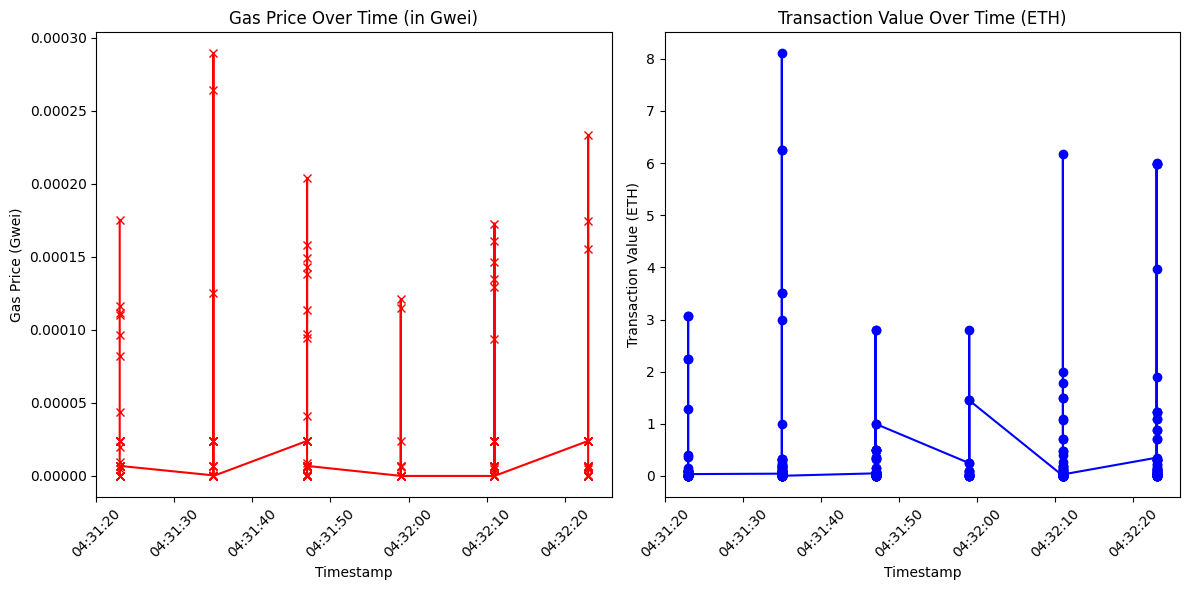

In [8]:
# Plot the gas price and value over time to understand demand-pressure
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(df['timeStamp'], df['gasUsed'].apply(lambda x: int(x) / 10**9), marker='x', color='r')
plt.title("Gas Price Over Time (in Gwei)")
plt.xlabel("Timestamp")
plt.ylabel("Gas Price (Gwei)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(df['timeStamp'], df['value'], marker='o', color='b')
plt.title("Transaction Value Over Time (ETH)")
plt.xlabel("Timestamp")
plt.ylabel("Transaction Value (ETH)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


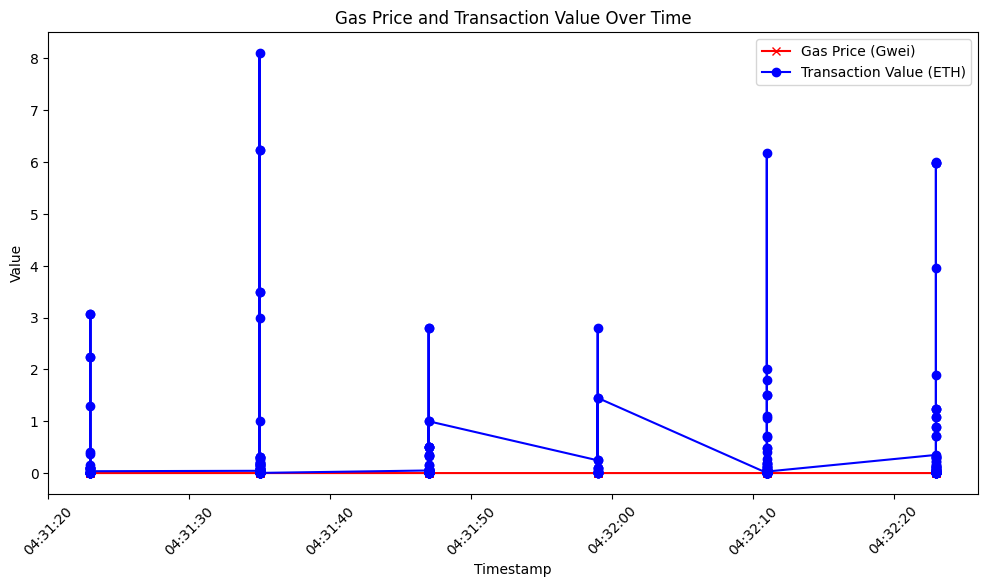

In [9]:
# Create a combined figure
plt.figure(figsize=(12, 6))

# Plot Gas Price Over Time (in Gwei)
plt.plot(df['timeStamp'], df['gasUsed'].apply(lambda x: int(x) / 10**9), marker='x', color='r', label='Gas Price (Gwei)')

# Plot Transaction Value Over Time (ETH)
plt.plot(df['timeStamp'], df['value'], marker='o', color='b', label='Transaction Value (ETH)')

# Add titles and labels
plt.title("Gas Price and Transaction Value Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.xticks(rotation=45)

# Add a legend to differentiate the plots
plt.legend()

# Display the plot
plt.show()


Correlation between Gas Used and Transaction Value

In [10]:
# Calculate the Pearson correlation coefficient and the p-value
from scipy.stats import pearsonr
df['gasUsed'] = pd.to_numeric(df['gasUsed'])
correlation, p_value = pearsonr(df['gasUsed'], df['value'])

print(f"Correlation coefficient is: {correlation}")
print(f"The p-value is: {p_value}")

Correlation coefficient is: 0.17105108027629068
The p-value is: 0.0029561729101580587
